In [58]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from collections import OrderedDict
%matplotlib inline

In [59]:
#np.random.seed(1337)
#random.seed(1337)
rng = np.random.default_rng(seed=1337)

In [60]:
from sklearn.datasets import make_moons, make_blobs

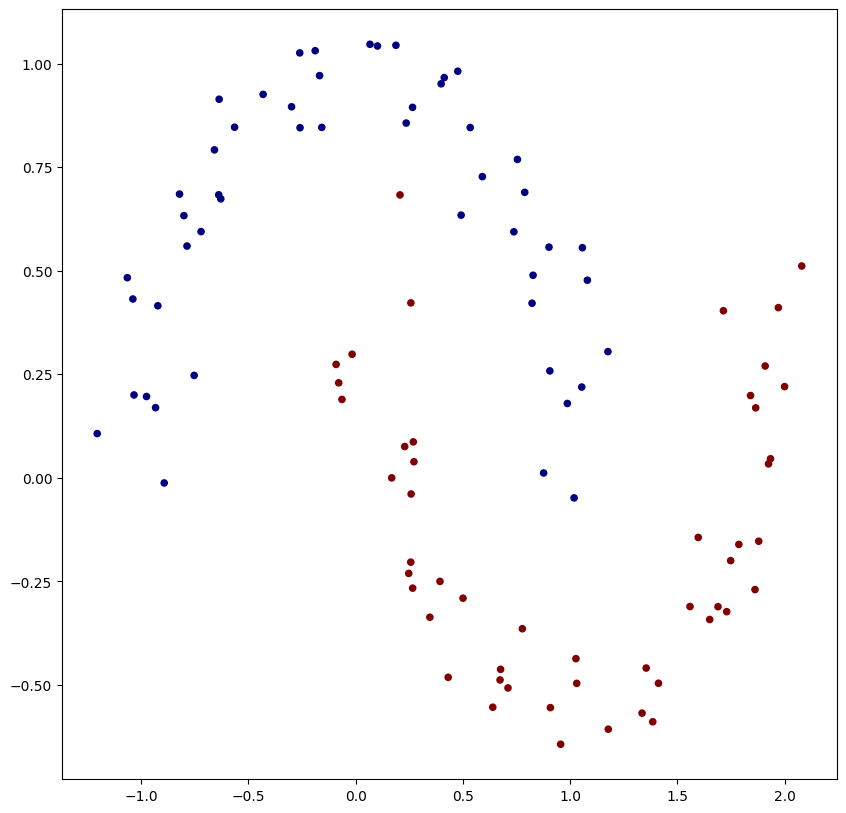

In [61]:
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet');

In [62]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(OrderedDict([
            ('layer1', nn.Linear(2, 16)),
            ('relu1', nn.ReLU()),
            ('layer2', nn.Linear(16, 16)),
            ('relu2', nn.ReLU()),
            ('resulting_layer', nn.Linear(16, 1))

        ]))

    def forward(self, x):
        return self.layers(x)
        

In [79]:
mlp = MLP()
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(mlp.parameters(), lr = 0.1)

In [80]:
X_train = torch.from_numpy(X).to(torch.float32)
Y_train = torch.from_numpy(y).to(torch.float32).reshape(100, 1)

In [81]:

for k in range(10000):
    optimizer.zero_grad()
    
    outputs = mlp(X_train)

    loss = loss_function(outputs, Y_train)

    loss.backward()

    optimizer.step()

    print(f"{k+1} iteration: loss = {loss}")



    

1 iteration: loss = 1.1326353549957275
2 iteration: loss = 1.017716884613037
3 iteration: loss = 0.9330299496650696
4 iteration: loss = 0.8625133037567139
5 iteration: loss = 0.7988498210906982
6 iteration: loss = 0.7385255694389343
7 iteration: loss = 0.6805232763290405
8 iteration: loss = 0.6267320513725281
9 iteration: loss = 0.5783722400665283
10 iteration: loss = 0.5368067622184753
11 iteration: loss = 0.5042986869812012
12 iteration: loss = 0.47998183965682983
13 iteration: loss = 0.46160751581192017
14 iteration: loss = 0.447549432516098
15 iteration: loss = 0.43644654750823975
16 iteration: loss = 0.4269920289516449
17 iteration: loss = 0.41877123713493347
18 iteration: loss = 0.4115559756755829
19 iteration: loss = 0.40504229068756104
20 iteration: loss = 0.39908599853515625
21 iteration: loss = 0.39347702264785767
22 iteration: loss = 0.3881210684776306
23 iteration: loss = 0.38296830654144287
24 iteration: loss = 0.37790030241012573
25 iteration: loss = 0.37311825156211853
2

In [85]:
mlp.layers.layer2.weight

Parameter containing:
tensor([[-1.8593e-02,  5.9580e-02,  1.6420e-01,  1.3760e-01,  2.2122e-01,
          6.6284e-02, -1.1147e-01, -7.6596e-02, -1.3543e-02, -3.2136e-01,
         -2.0610e-01, -6.1675e-02,  1.8300e-01,  8.1649e-02,  1.8707e-01,
          1.6741e-01],
        [-5.9051e-01,  3.5208e-01,  3.3640e-02, -1.8061e-01,  4.0000e-01,
          2.4399e-01, -1.1268e-01,  5.4915e-02, -1.7806e-01, -8.1994e-01,
         -1.2260e-01, -6.0944e-01,  5.6679e-03,  7.3733e-03,  1.8699e-01,
         -1.4737e-01],
        [ 2.1800e-01, -1.9602e-01,  2.9579e-03,  2.0847e-01, -1.1040e-01,
         -4.1969e-02, -1.6849e-02, -1.7703e-01, -5.6885e-02, -8.6793e-02,
          1.9944e-01,  4.0437e-02, -8.6771e-02,  4.7567e-02, -2.4634e-01,
          7.1616e-02],
        [-6.6218e-02,  2.2636e-01, -6.5835e-02,  3.3258e-03, -1.9500e-01,
         -2.7608e-01,  1.0980e-01,  2.0574e-01, -1.8151e-02, -5.6292e-01,
         -9.6733e-04,  1.6287e-01,  8.6325e-02,  9.3278e-02,  7.6239e-02,
         -5.7774e-02]

-2.2045406510779024 3.079132944915149
-1.6433018907966188 2.046641557880416


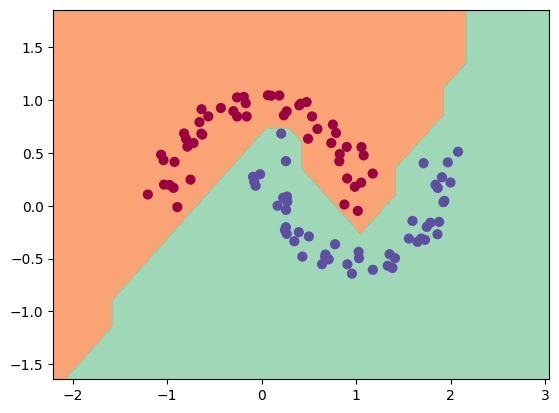

In [83]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
#inputs = [list(map(torch.Tensor, xrow)) for xrow in Xmesh]
inputs = torch.Tensor(Xmesh)
scores = list(map(mlp, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
#plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.nipy_spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

print(x_min, x_max)
print(y_min, y_max)